In [68]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [69]:
data=np.genfromtxt(path+'twvia_2018-07-23_f0000.txt', delimiter=',', skip_header=2, skip_footer=655) #Daten importieren

In [70]:
def convertfunc(x) -> float:
    # converts datetime into seconds past 2018-07-23, 00:00
    current_day = 23
    days = int(x[3:5]) - current_day  # will not work if dates are from different months
    seconds = int(x[11:13]) * 3600 + int(x[14:16]) * 60 + float(x[17:-1])
    return days * 86400 + seconds


datatime=np.genfromtxt(path+'twvia_2018-07-23_f0000.txt',
                     converters={0: convertfunc},
                     delimiter=',', skip_header=2, skip_footer=655)

In [71]:
time=datatime[:,0]/60 #Zeit in Minuten

c=data[:,1] #Wasserkonzentration in ppm
cerror=data[:,2]

D=data[:,5] #raw Delta 2H
Derror=data[:,6]

O17=data[:,7] #raw Delta O17
O17error=data[:,8]

O18=data[:,3] #raw Delta O18
O18error=data[:,4]

In [72]:
#Maske für den Messbereich
maske=(time>751)&(time<890) #Zeit in Minuten (23.07.18 12:31-14:50)
time=time[maske]

c=c[maske]
cerror=cerror[maske]

D=D[maske]
Derror=Derror[maske]

O17=O17[maske]
O17error=O17error[maske]

O18=O18[maske]
O18error=O18error[maske]

In [73]:
#Maske für den Heizbereich
maskeh=(time>875)&(time<883) #Zeit in Minuten (23.07.18 14:35-14:43)
timeh=time[maskeh]

ch=c[maskeh]
cerrorh=cerror[maskeh]

Dh=D[maskeh]
Derrorh=Derror[maskeh]

O17h=O17[maskeh]
O17errorh=O17error[maskeh]

O18h=O18[maskeh]
O18errohr=O18error[maskeh]

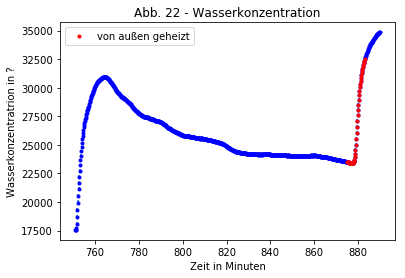

In [74]:
plt.plot(time, c, 'b.')
plt.plot(timeh, ch, 'r.', label='von außen geheizt')
plt.errorbar (time, c, yerr=cerror, linestyle='None')

plt.ylabel('Wasserkonzentratrion in ?')
plt.xlabel('Zeit in Minuten')
plt.legend()
plt.title('Abb. 22 - Wasserkonzentration')
plt.savefig(path2+'Abb22.png')

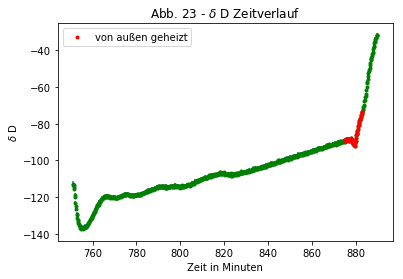

In [75]:
plt.plot(time, D, 'g.')
plt.plot(timeh, Dh, 'r.', label='von außen geheizt')
plt.errorbar (time, D, yerr=Derror, linestyle='None')

plt.ylabel('$\delta$ D')
plt.xlabel('Zeit in Minuten')
plt.title('Abb. 23 - $\delta$ D Zeitverlauf')
plt.legend()
plt.savefig(path2+'Abb23.png')

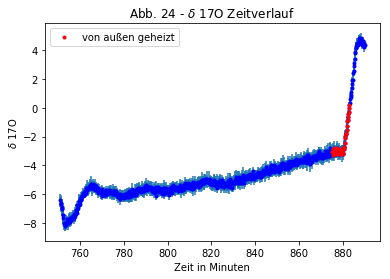

In [76]:
plt.plot(time, O17, 'b.')
plt.errorbar (time, O17, yerr=O17error, linestyle='None')
plt.plot(timeh, O17h, 'r.', label='von außen geheizt')

plt.ylabel('$\delta$ 17O')
plt.xlabel('Zeit in Minuten')
plt.title('Abb. 24 - $\delta$ 17O Zeitverlauf')
plt.legend()
plt.savefig(path2+'Abb24.png')

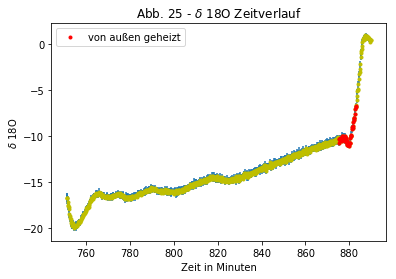

In [77]:
plt.plot(time, O18, 'y.')
plt.errorbar (time, O18, yerr=O18error, linestyle='None')
plt.plot(timeh, O18h, 'r.', label='von außen geheizt')

plt.ylabel('$\delta$ 18O')
plt.xlabel('Zeit in Minuten')
plt.title('Abb. 25 - $\delta$ 18O Zeitverlauf')
plt.legend()
plt.savefig(path2+'Abb25.png')